In [190]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

dimention de X :  (100, 2)
dimention de y :  (100, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

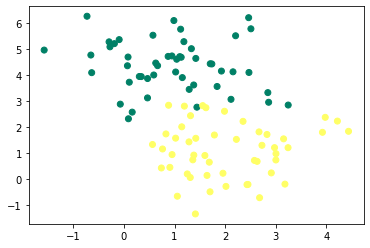

In [191]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimention de X : ' , X.shape)
print('dimention de y : ' , y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.show

## Fonction

In [192]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [193]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [194]:
def log_loss(A, y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [195]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return(dW, db)

In [196]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [197]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

In [198]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [199]:
def artificial_neuron(X, y, learning_rate=0.1, n_iteration=100):
    # initialisation de W et b
    W, b = initialisation(X)
    
    Loss = []
    acc = []
    
    # Boucle d'apprentissange
    for i in tqdm(range(n_iteration)):
        
        # activations
        A = model(X, W, b)
        
        if i % 10 == 0:
    
            # calcul du coût
            Loss.append(log_loss(A, y))
        
            # calcul de l'accuracy
            y_pred = predict(X, W, b)
            acc.append(accuracy_score(y, y_pred))
        
        # mise à jour
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(Loss)
    plt.subplot(1, 2, 2)
    plt.plot(acc)
    plt.show
    
    return (W, b)

100%|██████████| 100/100 [00:00<00:00, 8339.07it/s]


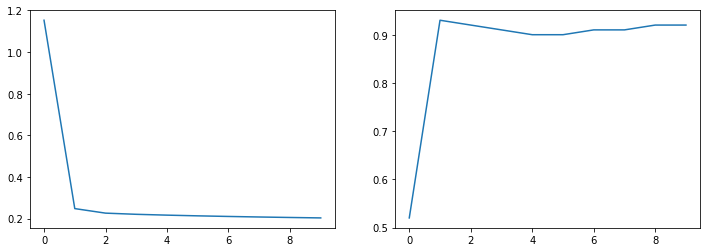

In [200]:
W, b = artificial_neuron(X, y)

## Exemple

This plant is toxic


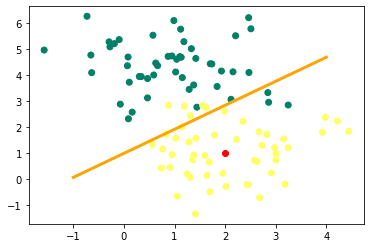

In [201]:
new_plant = np.array([2, 1])

x0 = np.linspace(-1, 4, 100)
x1 = ( -W[0] * x0 - b ) / W[1]

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1],c='r')
plt.plot(x0, x1, c='orange', lw=3)
plt.show
if predict(new_plant, W, b) == True:
    print('This plant is toxic')
else:
    print('This plant is not toxic')

## Entrainement du Modèle

In [202]:
from utilities import *

In [203]:
X_train, y_train, X_test, y_test = load_data()

In [204]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max()
X_train_reshape.shape

(1000, 4096)

In [205]:
X_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_train.max()
X_test_reshape.shape

(200, 4096)

In [211]:
def artificial_neuron_2(X_train, y_train, X_test, y_test, learning_rate=0.1, n_iteration=100):
    # initialisation de W et b
    W, b = initialisation(X_train)
    
    train_loss = []
    train_acc = []
    
    test_loss = []
    test_acc = []
    
    # Boucle d'apprentissange
    for i in tqdm(range(n_iteration)):
        
        # activations
        A = model(X_train, W, b)
        
        if i % 10 == 0:
    
            # Train calcul
            train_loss.append(log_loss(A, y_train))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))
            
             # Test calcul
            A_test = model(X_test, W, b)
            test_loss.append(log_loss(A_test, y_test))
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))
        
        # mise à jour
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train Loss')
    plt.plot(test_loss, label='Test Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train Accurancy')
    plt.plot(test_acc, label='Test Accurancy')
    plt.show
    
    return (W, b)

100%|██████████| 10000/10000 [01:23<00:00, 119.73it/s]


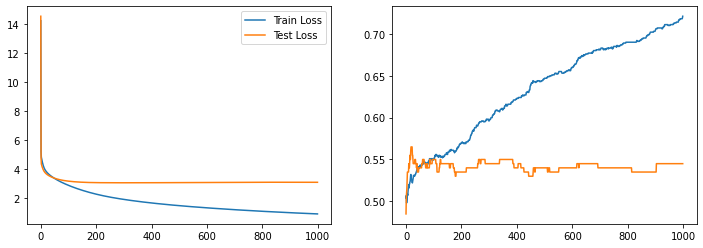

In [212]:
W, b = artificial_neuron_2(X_train_reshape, y_train, X_test_reshape, y_test,learning_rate=0.01, n_iteration=10000)